In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) # Muestra todas las columnas de un DataFrame
sns.set(style="whitegrid", palette="viridis") # Define un estilo de graficos

# Carga de dataset
df = pd.read_csv("../data/raw/housing.csv")

# Vista de las primeras 5 filas
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [35]:
# Renombra columnas del DataFrame
df.rename(columns={
    'longitude': 'longitud',
    'latitude': 'latitud',
    'housing_median_age': 'edad_media_vivienda',
    'total_rooms': 'total_habitaciones',
    'total_bedrooms': 'total_dormitorios',
    'population': 'poblacion',
    'households': 'hogares',
    'median_income': 'ingreso_medio',
    'median_house_value': 'valor_medio_vivienda',
    'ocean_proximity': 'proximidad_oceano'
}, inplace=True) # Aplica cambios directamente sobre el DataFrame original


In [36]:
# Renombrar categorias de proximidad al oceano
mapa_proximidad = {
    "NEAR BAY": "Cerca de la bahía",
    "<1H OCEAN": "A menos de 1 hora del océano",
    "INLAND": "Tierra adentro",
    "NEAR OCEAN": "Cerca del océano",
    "ISLAND": "Isla"
}

# Reemplaza los valores originales usando el diccionario definido arriba
df["proximidad_oceano"] = df["proximidad_oceano"].replace(mapa_proximidad)

In [37]:
df.head()

,longitud,latitud,edad_media_vivienda,total_habitaciones,total_dormitorios,poblacion,hogares,ingreso_medio,valor_medio_vivienda,proximidad_oceano
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,Cerca de la bahía
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,Cerca de la bahía
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,Cerca de la bahía
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,Cerca de la bahía
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,Cerca de la bahía


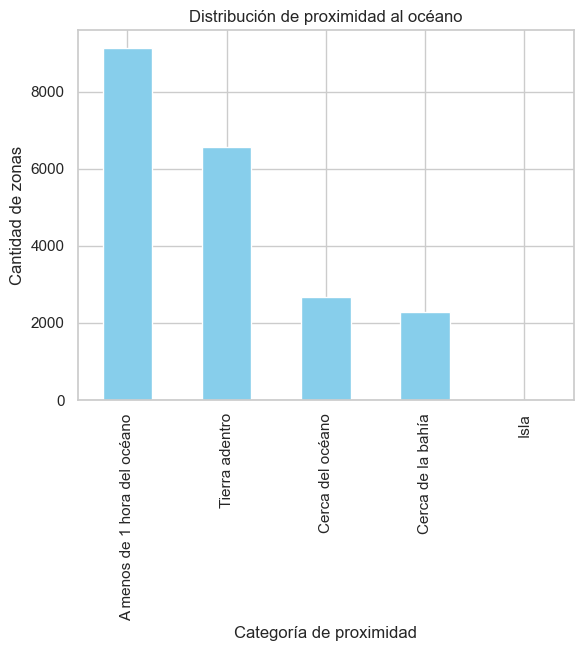

proximidad_oceano
A menos de 1 hora del océano    9136
Tierra adentro                  6551
Cerca del océano                2658
Cerca de la bahía               2290
Isla                               5
Name: count, dtype: int64

In [ ]:
# Crea grafico de barras con el conteo de cada categoria
df["proximidad_oceano"].value_counts().plot(
    kind="bar",
    color="skyblue",
    title="Distribución de proximidad al océano"
)

plt.xlabel("Categoría de proximidad")
plt.ylabel("Cantidad de zonas")
plt.show()

# Muestra en consola el conteo numerico de cada categoria
df["proximidad_oceano"].value_counts()

In [45]:
# Deteccion de valores nulos
df.isnull().sum()

longitud                  0
latitud                   0
edad_media_vivienda       0
total_habitaciones        0
total_dormitorios       207
poblacion                 0
hogares                   0
ingreso_medio             0
valor_medio_vivienda      0
proximidad_oceano         0
dtype: int64

In [46]:
# Rellena los valores NaN con la mediana de la misma columna
df["total_dormitorios"].fillna(df["total_dormitorios"].median(), inplace=True)
df.isnull().sum()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18516\2140534456.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["total_dormitorios"].fillna(df["total_dormitorios"].median(), inplace=True)


longitud                0
latitud                 0
edad_media_vivienda     0
total_habitaciones      0
total_dormitorios       0
poblacion               0
hogares                 0
ingreso_medio           0
valor_medio_vivienda    0
proximidad_oceano       0
dtype: int64

In [ ]:
# Promedio de habitaciones por hogar
df["habitaciones_por_hogar"] = df["total_habitaciones"] / df["hogares"]
# Promedio de dormitorios por hogar
df["dormitorios_por_hogar"] = df["total_dormitorios"] / df["hogares"]
# Promedio de habitaciones por persona
df["habitaciones_por_persona"] = df["total_habitaciones"] / df["poblacion"]

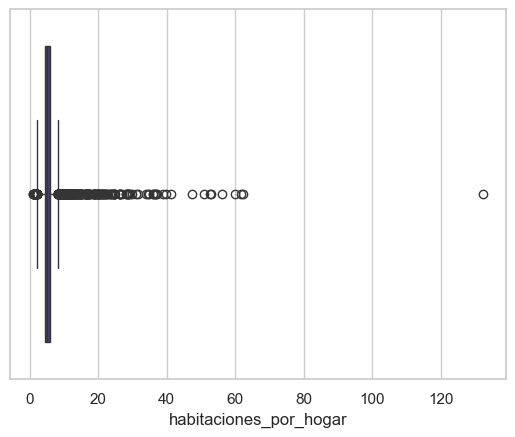

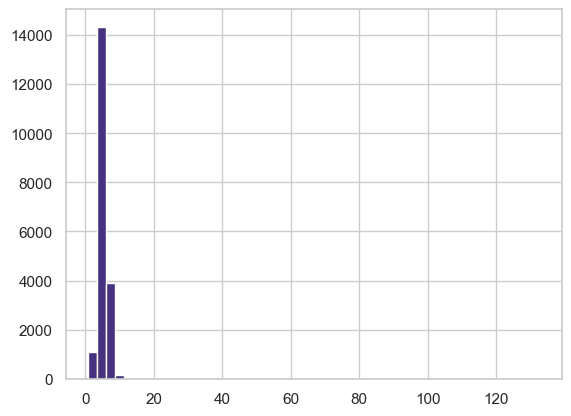

In [50]:
sns.boxplot(x=df["habitaciones_por_hogar"])
plt.show()

df["habitaciones_por_hogar"].hist(bins=50)
plt.show()

In [ ]:

upper_limit = df["habitaciones_por_hogar"].quantile(0.99)
lower_limit = df["habitaciones_por_hogar"].quantile(0.01)

df["habitaciones_por_hogar"] = np.where(
    df["habitaciones_por_hogar"] > upper_limit, upper_limit,
    np.where(df["habitaciones_por_hogar"] < lower_limit, lower_limit, df["habitaciones_por_hogar"])
)


In [53]:
# Mantener solo las viviendas con valor menor a 500.000
df = df[df["valor_medio_vivienda"] < 500000]
# Esto elimina filas con valores extremadamente altos que podrian sesgar el analisis o los modelos

In [55]:
# Muestra numero de filas, columnas, tipos de datos, valores no nulos y memoria usada
df.info()
# Muestra conteo, media, desviacion estandar, percentiles y valores extremos
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 19254 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitud                  19254 non-null  float64
 1   latitud                   19254 non-null  float64
 2   edad_media_vivienda       19254 non-null  float64
 3   total_habitaciones        19254 non-null  float64
 4   total_dormitorios         19254 non-null  float64
 5   poblacion                 19254 non-null  float64
 6   hogares                   19254 non-null  float64
 7   ingreso_medio             19254 non-null  float64
 8   valor_medio_vivienda      19254 non-null  float64
 9   proximidad_oceano         19254 non-null  object 
 10  habitaciones_por_hogar    19254 non-null  float64
 11  dormitorios_por_hogar     19254 non-null  float64
 12  habitaciones_por_persona  19254 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.1+ MB


,longitud,latitud,edad_media_vivienda,total_habitaciones,total_dormitorios,poblacion,hogares,ingreso_medio,valor_medio_vivienda,habitaciones_por_hogar,dormitorios_por_hogar,habitaciones_por_persona
count,19254.000000,19254.000000,19254.000000,19254.000000,19254.000000,19254.000000,19254.000000,19254.000000,19254.000000,19254.000000,19254.000000,19254.000000
mean,-119.573066,35.647242,28.435442,2623.963176,536.584554,1449.003999,503.588397,3.694149,192373.330061,5.239699,1.071697,1.883102
std,2.007517,2.145260,12.475002,2166.566108,415.770239,1141.970106,382.004141,1.559141,97282.841798,1.117371,0.255484,0.566869
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,2.924926,0.121204,0.002547
25%,-121.780000,33.930000,18.000000,1449.000000,299.250000,807.000000,284.000000,2.547325,116400.000000,4.434783,1.005019,1.508451
50%,-118.510000,34.270000,29.000000,2119.000000,435.000000,1186.000000,414.000000,3.470550,174000.000000,5.185730,1.047905,1.910839
75%,-117.990000,37.720000,37.000000,3123.000000,642.000000,1750.000000,607.000000,4.600000,248575.000000,5.953199,1.097895,2.240802
max,-114.550000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,499100.000000,8.318704,27.187500,6.000000


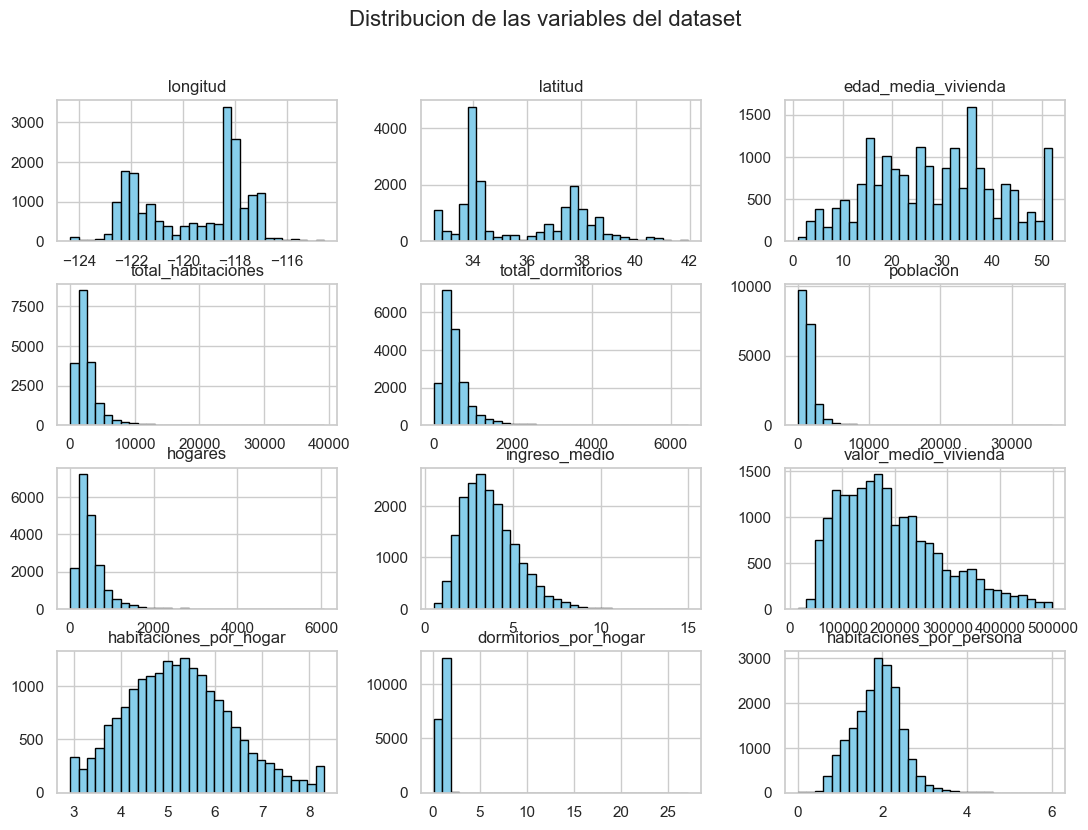

In [ ]:
# Crea un histograma con tamaño, color y borde personalizado
df.hist(figsize=(13,9),
        bins=30,
        color='skyblue',
        edgecolor='black')
plt.suptitle("Distribucion de las variables del dataset", fontsize=16)
plt.show()


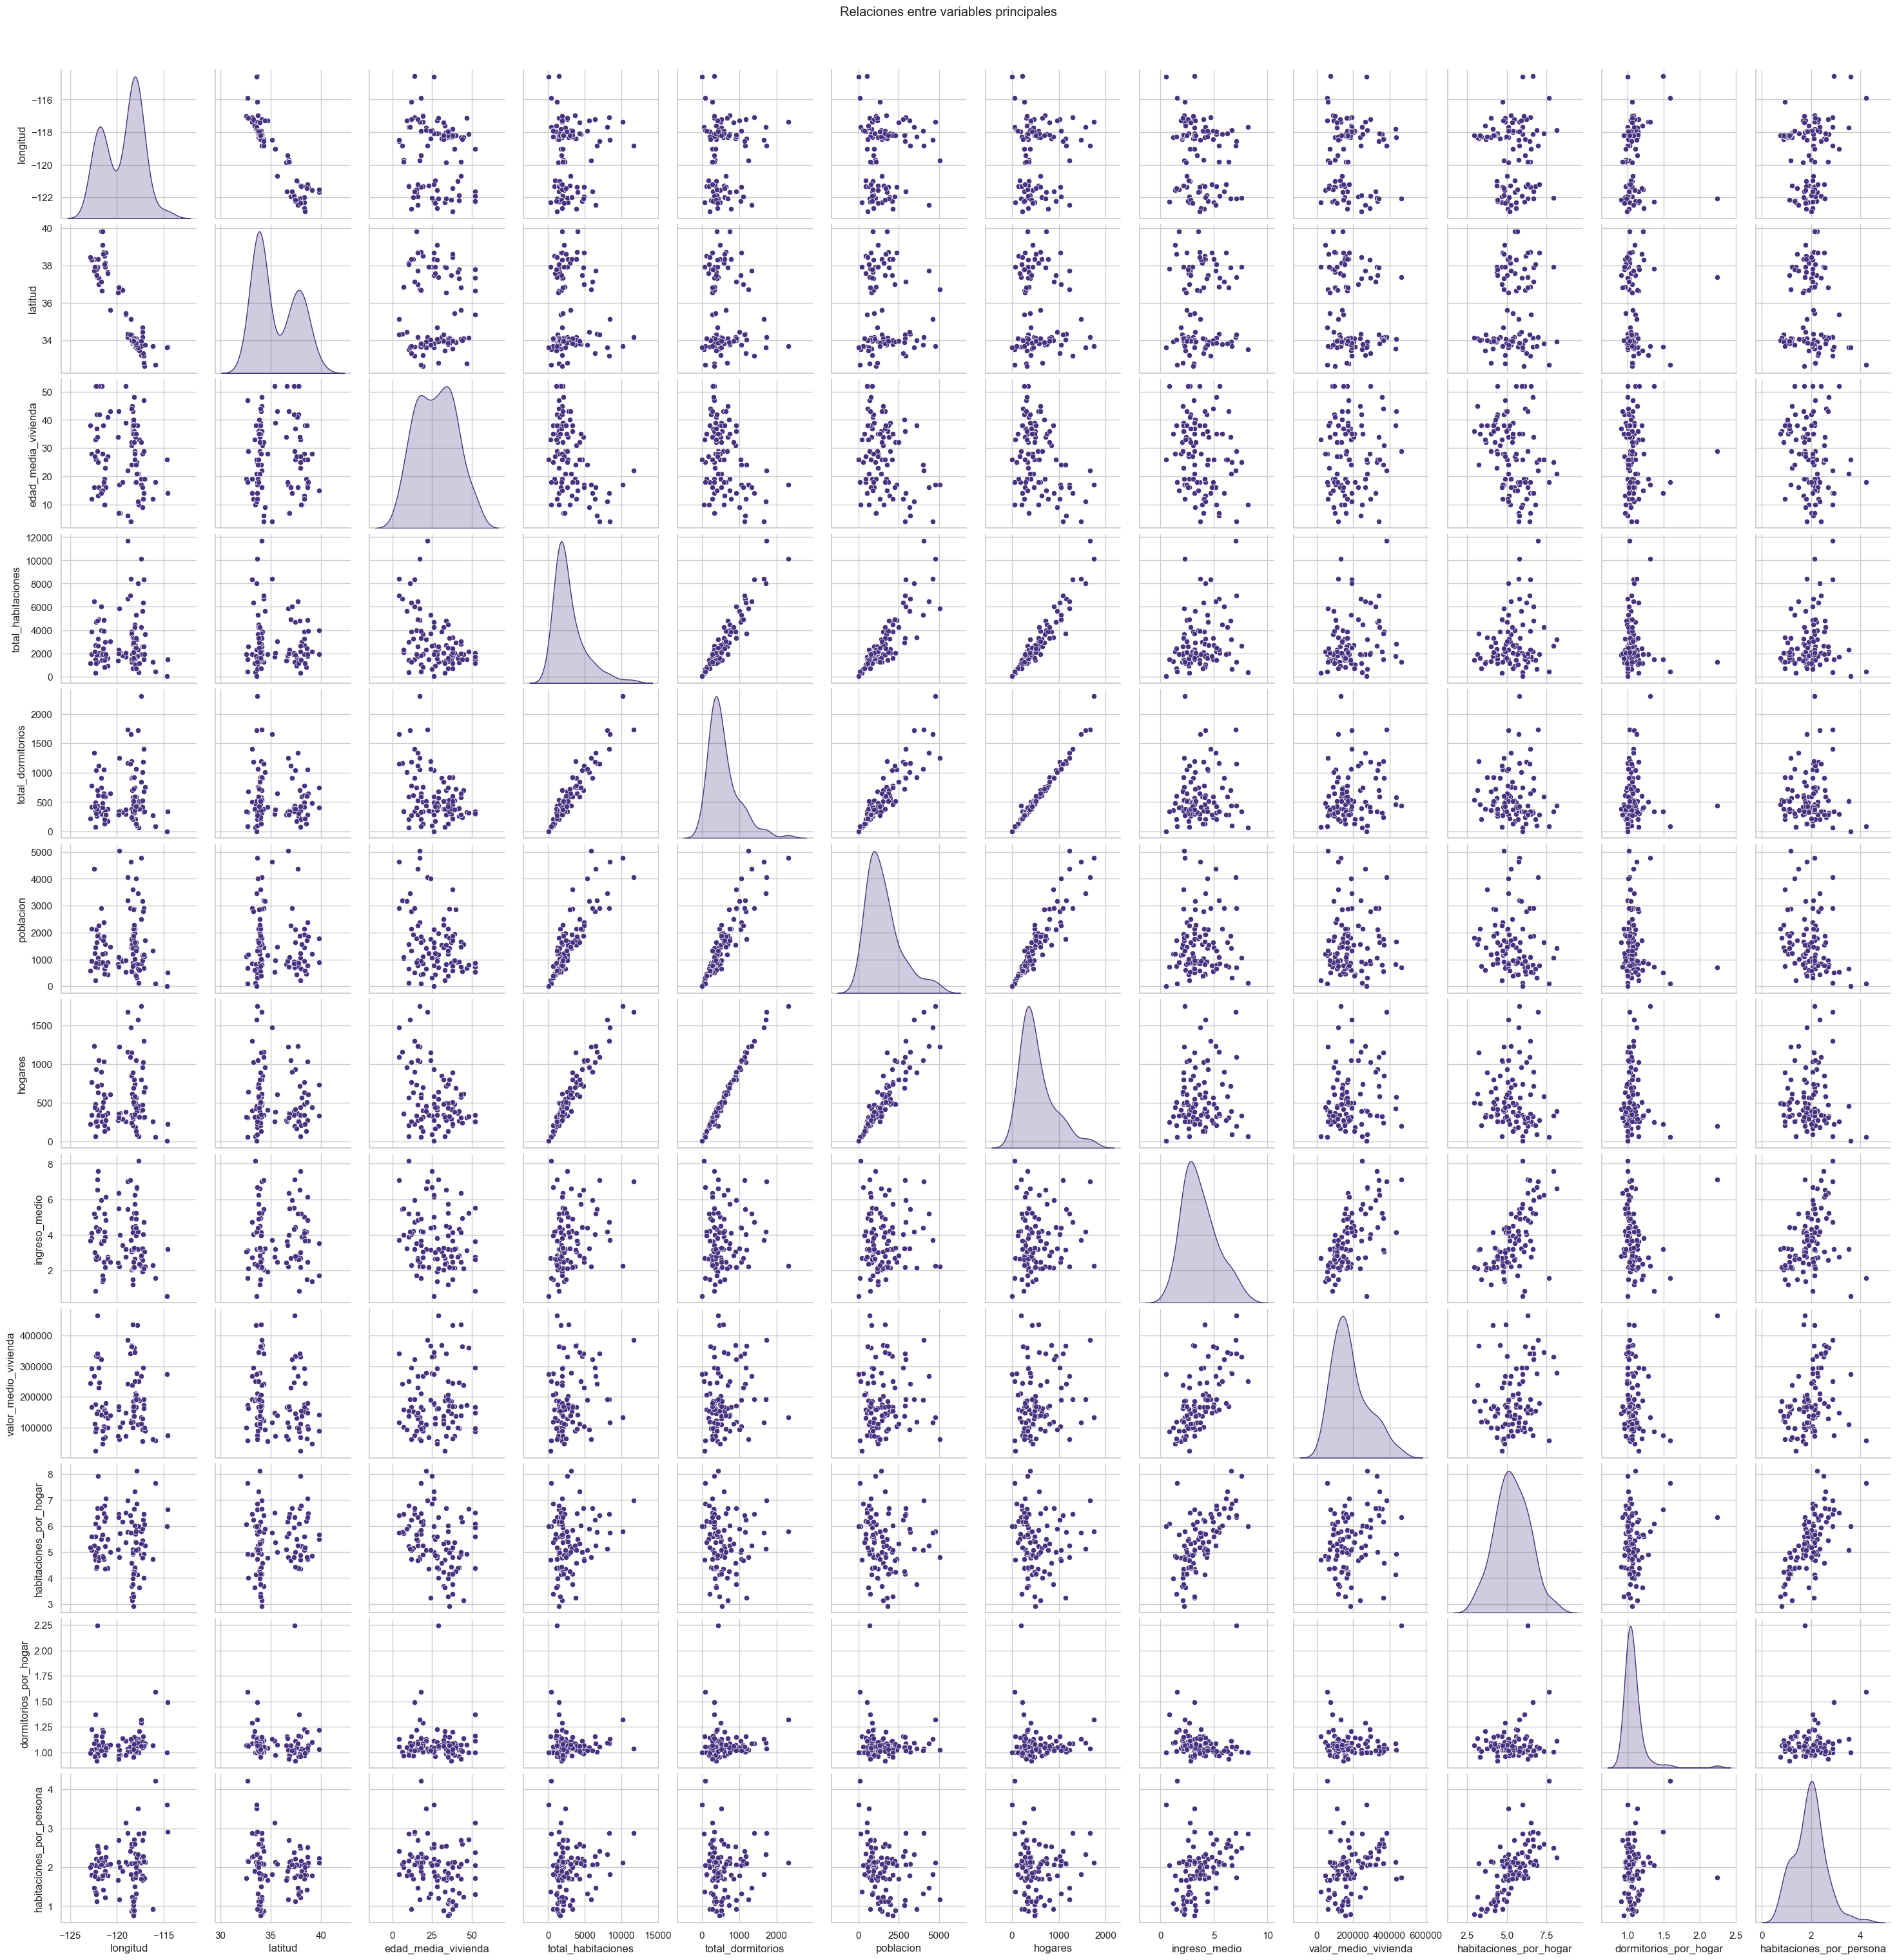

In [ ]:
# Toma muestra aleatoria de 100 filas y dibuja en la diagonal la densidad de cada variable
sns.pairplot(df.sample(100), diag_kind="kde")
plt.suptitle("Relaciones entre variables principales", y=1.02)
plt.show()


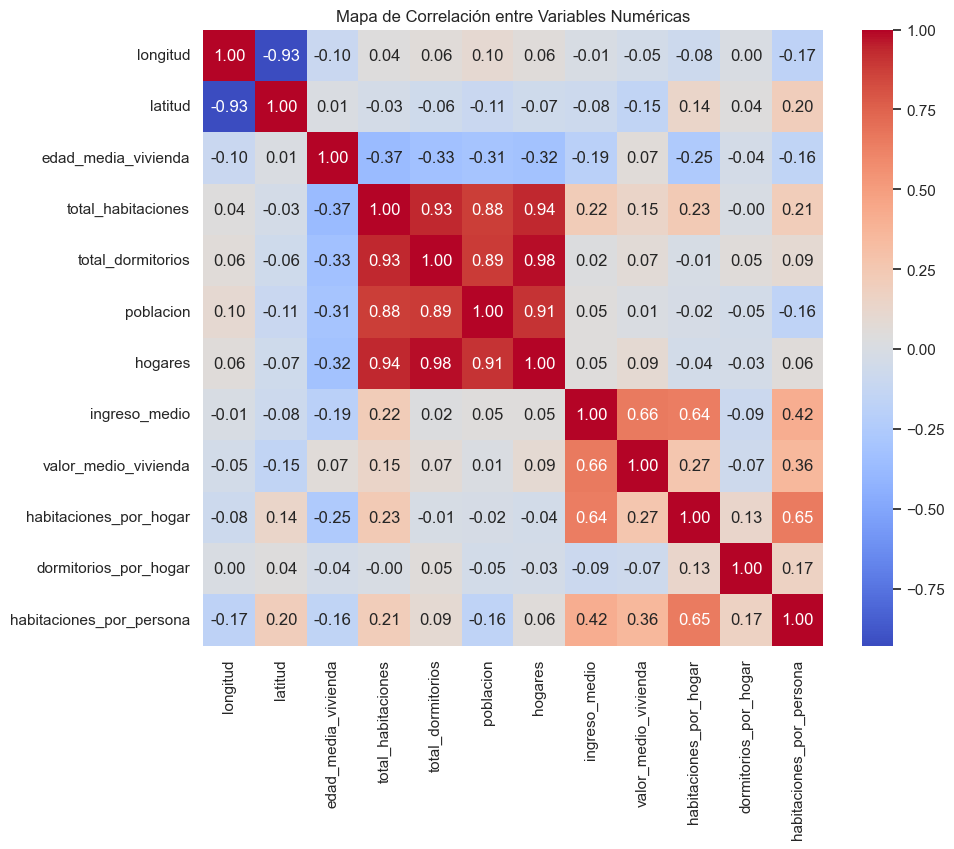

In [ ]:
# Dibuja heatmap con anotaciones, gradiente de color y formato de 2 decimales
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Correlación entre Variables Numéricas")
plt.show()


In [ ]:
# Calcula la matriz de correlacion entre las columnas y ordena de mayor a menor
correlaciones = df.corr(numeric_only=True)["valor_medio_vivienda"].sort_values(ascending=False)
correlaciones


valor_medio_vivienda        1.000000
ingreso_medio               0.655925
habitaciones_por_persona    0.357214
habitaciones_por_hogar      0.268632
total_habitaciones          0.146355
hogares                     0.091224
total_dormitorios           0.073410
edad_media_vivienda         0.065736
poblacion                   0.008551
longitud                   -0.045525
dormitorios_por_hogar      -0.071495
latitud                    -0.148758
Name: valor_medio_vivienda, dtype: float64

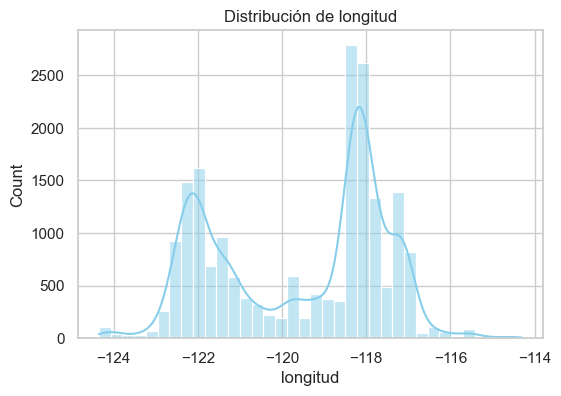

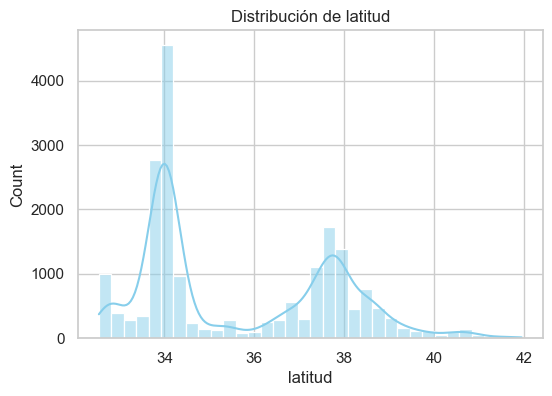

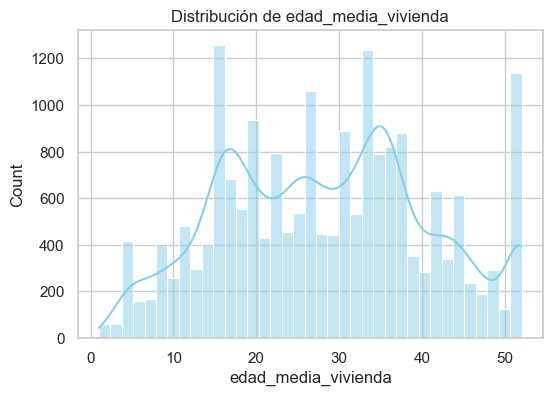

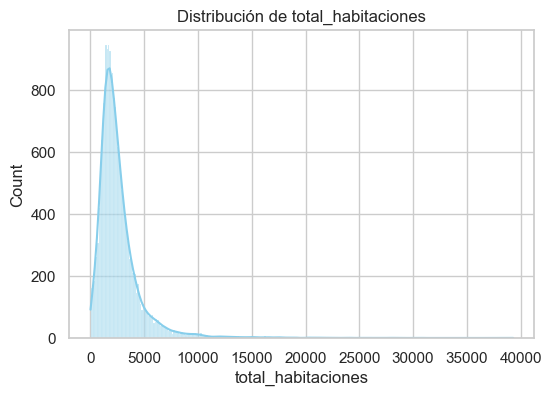

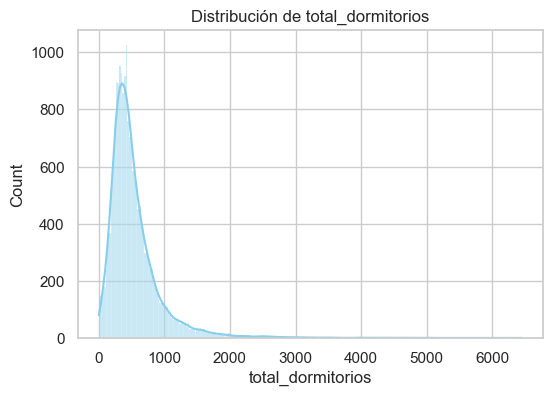

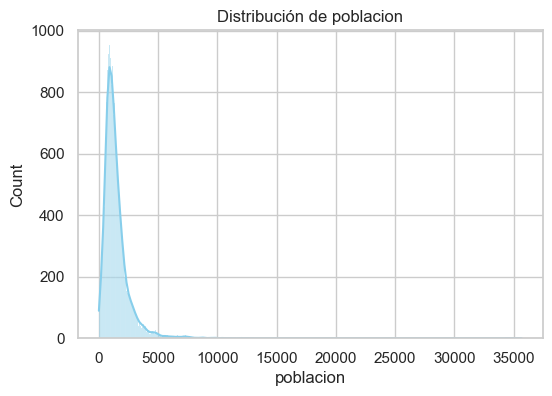

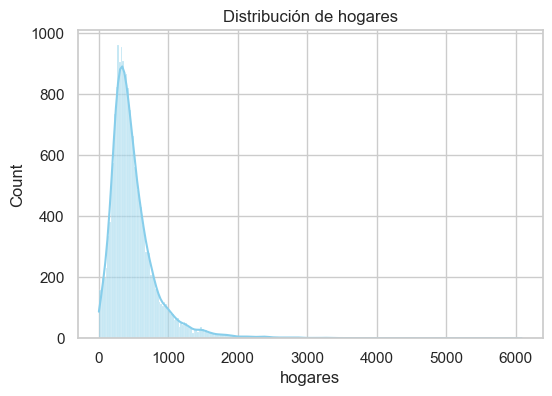

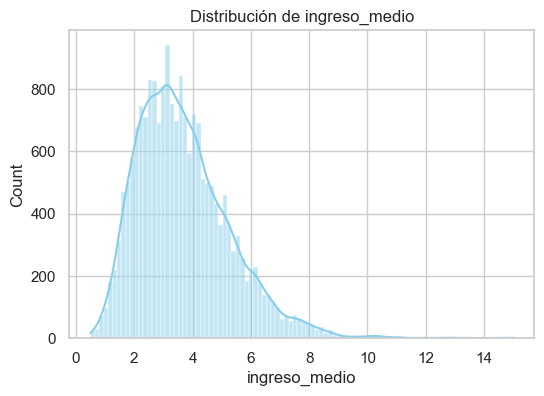

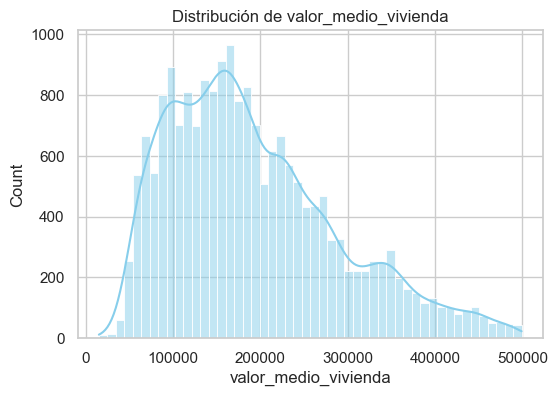

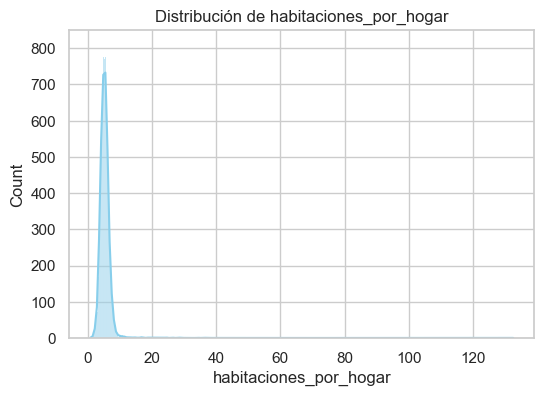

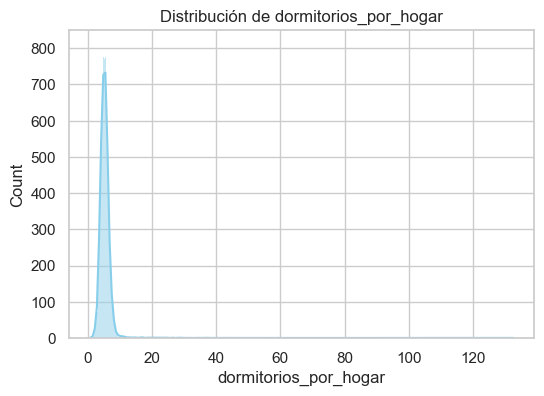

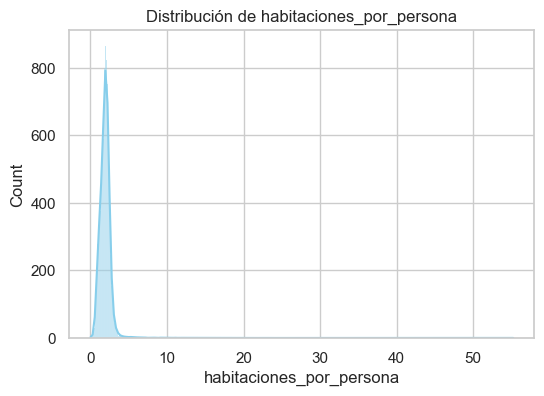

In [ ]:
# Selecciona todas las columnas numericas
columnas_numericas = df.select_dtypes(include=["float64", "int64"]).columns

# Itera sobre cada columna y grafica histrograma con KDE
for col in columnas_numericas:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, color="skyblue")
    plt.title(f"Distribución de {col}")
    plt.show()


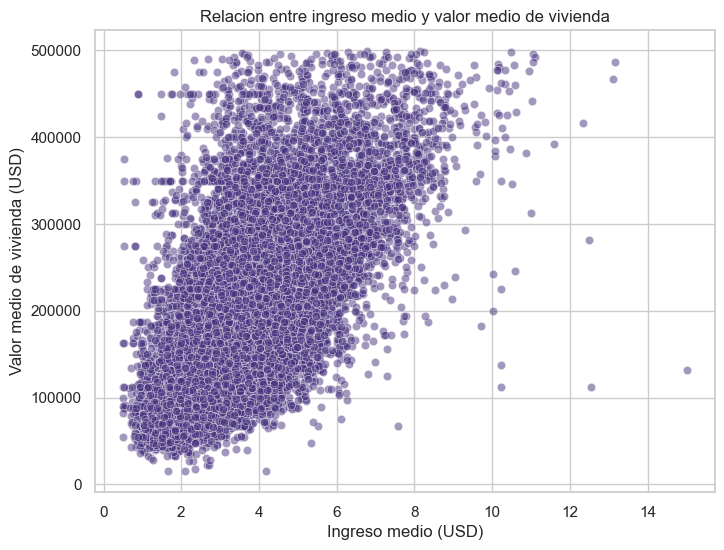

In [ ]:
# Scatter plot: relacion ingreso medio vs valor medio de vivienda
plt.figure(figsize=(8,6))
sns.scatterplot(x="ingreso_medio",
                y="valor_medio_vivienda",
                data=df,
                alpha=0.5)

plt.title("Relacion entre ingreso medio y valor medio de vivienda")
plt.xlabel("Ingreso medio (USD)")
plt.ylabel("Valor medio de vivienda (USD)")
plt.show()

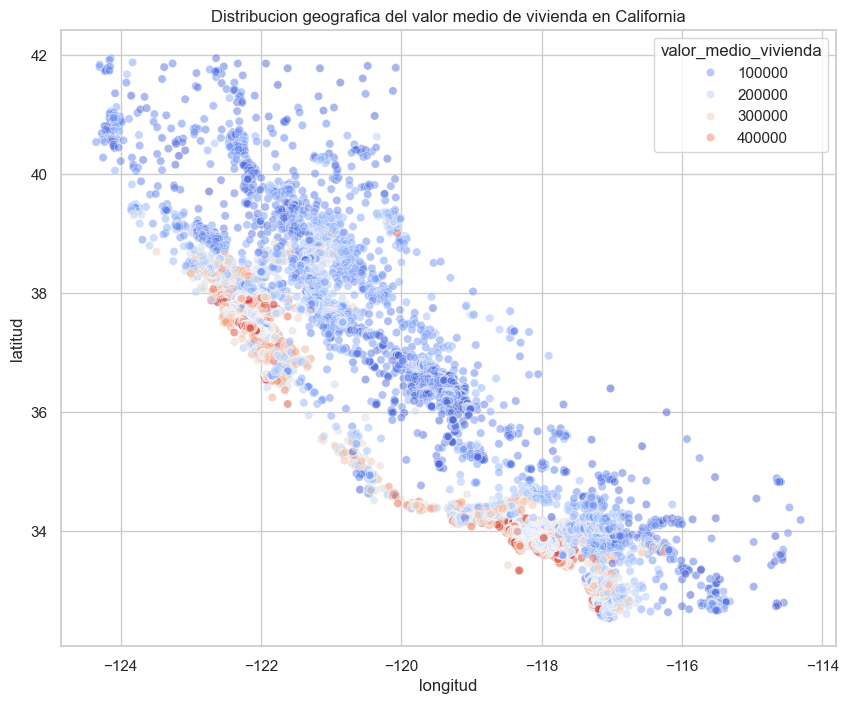

In [ ]:
# Scatter plot geografico: longitud vs latitud con valor medio de vivienda

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x="longitud", y="latitud",
    hue="valor_medio_vivienda", palette="coolwarm",
    data=df, alpha=0.5
)

plt.title("Distribucion geografica del valor medio de vivienda en California")
plt.show()

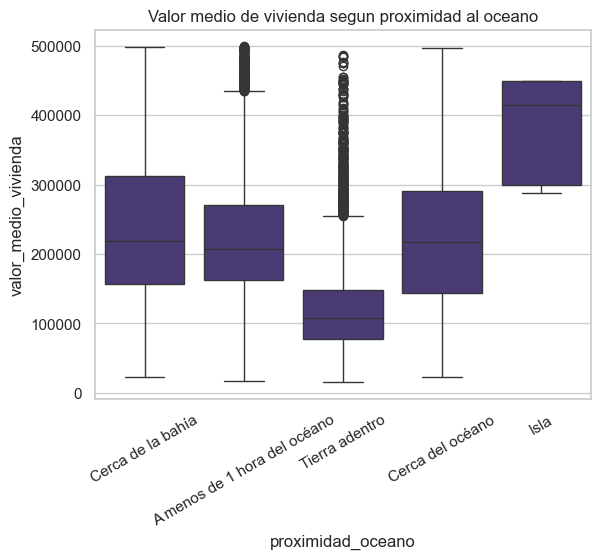

In [ ]:
# Boxplot: valor medio de vivienda segun proximidad al oceano

sns.boxplot(x="proximidad_oceano", y="valor_medio_vivienda", data=df)
plt.title("Valor medio de vivienda segun proximidad al oceano")
plt.xticks(rotation=30)
plt.show()